1. Data Exploration

In [2]:
import pandas as pd

# Load the dataset
url = "RecruitmentDataEng-TransformationTest-main\global_sales.csv"
df = pd.read_csv(url)

# Basic exploration
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())


(2823, 19)
Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'STATE',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object')
ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CUSTOMERNAME        object
CITY                object
STATE               object
POSTALCODE          object
COUNTRY             object
DEALSIZE            object
dtype: object
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121              

 2. Data Cleaning & Transformation

In [3]:
# Drop duplicates if any
df = df.drop_duplicates()

# Convert date columns (if any)
# Example: df['Order Date'] = pd.to_datetime(df['Order Date'])

# Handle missing values
# Option 1: Drop rows — df.dropna()
# Option 2: Fill values — df['Column'].fillna(value, inplace=True)

# Optional: Rename columns for clarity
# df.rename(columns={'OldName': 'NewName'}, inplace=True)

# Feature Engineering Example:
# df['Profit Margin'] = df['Profit'] / df['Sales']


 3. Analysis
 
Use groupby, pivot_table, describe, or corr to explore patterns.

In [5]:
# Normalize column names for consistency
df.columns = df.columns.str.strip().str.upper()

# Total sales by country
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
print("Top countries by total sales:")
print(country_sales.head())

# Total sales by year
yearly_sales = df.groupby('YEAR_ID')['SALES'].sum().sort_values()
print("\nSales trend by year:")
print(yearly_sales)

# Correlation matrix for numeric columns
correlation = df.corr(numeric_only=True)
print("\nCorrelation matrix:")
print(correlation)


Top countries by total sales:
COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Name: SALES, dtype: float64

Sales trend by year:
YEAR_ID
2005    1791486.71
2003    3516979.54
2004    4724162.60
Name: SALES, dtype: float64

Correlation matrix:
                 ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER         1.000000         0.065543  -0.002935        -0.055550   
QUANTITYORDERED     0.065543         1.000000   0.005564        -0.018397   
PRICEEACH          -0.002935         0.005564   1.000000        -0.020965   
ORDERLINENUMBER    -0.055550        -0.018397  -0.020965         1.000000   
SALES               0.039919         0.551426   0.657841        -0.058400   
QTR_ID             -0.051383        -0.035323   0.008712         0.040716   
MONTH_ID           -0.039723        -0.039048   0.005152         0.034016   
YEAR_ID             0.904596         0.069535  -0.005938      

 4. Visualization
 
Use matplotlib or seaborn for charts.

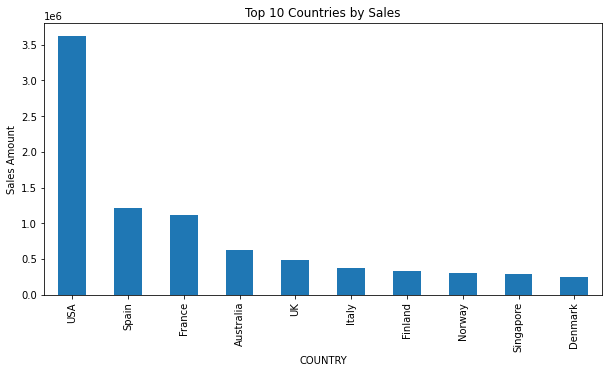

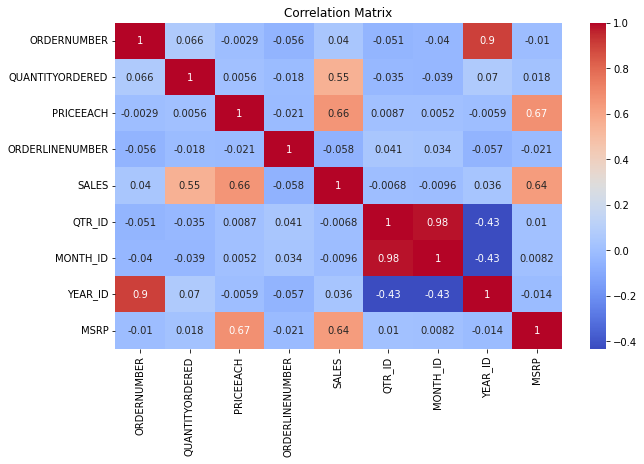

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Top 10 countries by sales
country_sales.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Sales')
plt.ylabel('Sales Amount')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
